In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math

Importing Data set

In [17]:
df = pd.read_csv('Salary_Data.csv')

In [18]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [19]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [20]:
df.shape

(30, 2)

In [21]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [34]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

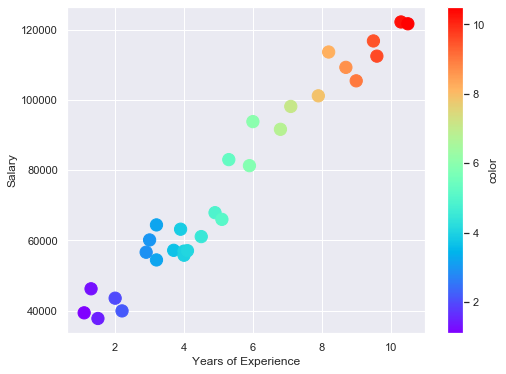

In [101]:
plt.figure(figsize=(8,6))

plt.scatter(df['YearsExperience'], df['Salary'], c=df['YearsExperience'], marker='o', s=150, cmap='rainbow')
plt.colorbar(label='color')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

As there is Linear relation btw Experience and Salary.<br>
so, we use Simple linear Regression

In [43]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:, -1:].values

(30, 1)

Split data into tain test

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=1/4)

<h1>Simple linear Regression Model</h1>

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
Y_pred = model.predict(X_test)

Mean Square Error<br>R-Square

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean Square Error : ', mean_squared_error(Y_test, Y_pred))
print('Root Mean Square Error : ', math.sqrt(mean_squared_error(Y_test, Y_pred)))
print('Mean absolute error : ',mean_absolute_error(Y_test, Y_pred))
print('R-Sqaure : ', r2_score(Y_test, Y_pred))

Mean Square Error :  22407940.143340684
Root Mean Square Error :  4733.70258289858
Mean absolute error :  3508.5455930660555
R-Sqaure :  0.9779208335417602


Traning Graph

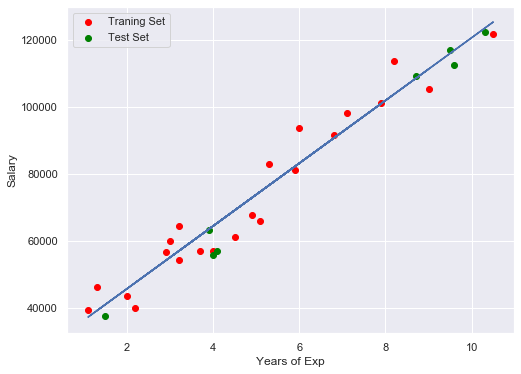

In [107]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, color='red', label='Traning Set')
plt.scatter(X_test, Y_test, color='green', label='Test Set')
plt.plot(X_train, model.predict(X_train))
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.legend()
plt.show()

<h1>Polynomial Regression Model</h1>

In [139]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y)
model_poly = LinearRegression()
model_poly.fit(X_poly, Y)

Y_pred = model_poly.predict(poly_reg.fit_transform(X))

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean Square Error : ', mean_squared_error(Y, Y_pred))
print('Root Mean Square Error : ', math.sqrt(mean_squared_error(Y, Y_pred)))
print('Mean absolute error : ',mean_absolute_error(Y, Y_pred))
print('R-Sqaure : ', r2_score(Y, Y_pred))

Mean Square Error :  26403845.623880085
Root Mean Square Error :  5138.4672446051545
Mean absolute error :  4265.608949007851
R-Sqaure :  0.9636560599375092


Plot

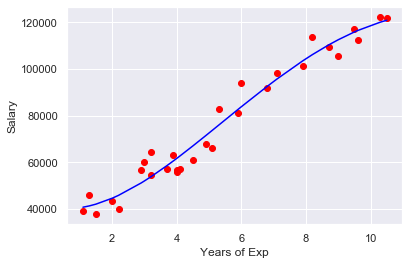

In [135]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.show()

In [146]:
print(model.predict([[4]]))

[[64505.53328452]]
